In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow  as tf
from tensorflow import keras

## Loading fashion mnist dataset 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full , y_train_full),(x_test, y_test) = fashion_mnist.load_data()

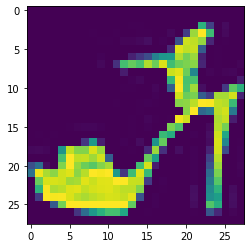

In [3]:
plt.imshow(x_train_full[9])

In [4]:
classnames = ["Tshirt/top","Trouser","Pullover","Dress",
              "Coat", "Scandal", "Shirt", "Sneaker"
             ,"Bag", "Ankel Boot"]

In [5]:
classnames[y_train_full[45]]

'Pullover'

# Data Normalization 
simple way to divide with 255 

In [6]:
x_train_n = x_train_full/255
x_test_n = x_test / 255

### Spliting the data into train & validation & test datasets

In [7]:
x_valid , x_train = x_train_n[:5000], x_train_n[5000:]
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
model_history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4842 - accuracy: 0.8321 - val_loss: 0.4351 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4390 - accuracy: 0.8455 - val_loss: 0.5362 - val_accuracy: 0.7970
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4122 - accuracy: 0.8562 - val_loss: 0.3923 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3937 - accuracy: 0.8623 - val_loss: 0.3751 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3749 - accuracy: 0.8677 - val_loss: 0.3710 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3629 - accuracy: 0.8713 - val_loss: 0.3631 - val_accurac

In [12]:
model.save("my_mode.h5")

In [13]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [14]:
model_history.history


{'loss': [0.7238965630531311,
  0.48418307304382324,
  0.439037024974823,
  0.41219499707221985,
  0.3936617076396942,
  0.3749487102031708,
  0.36287903785705566,
  0.3514813184738159,
  0.3411000072956085,
  0.3319225609302521,
  0.3239809274673462,
  0.31475409865379333,
  0.3081034719944,
  0.30204498767852783,
  0.2945103645324707,
  0.2889232635498047,
  0.28379756212234497,
  0.2777343988418579,
  0.27271708846092224,
  0.2672058343887329,
  0.26246899366378784,
  0.25759658217430115,
  0.2533951997756958,
  0.2485007643699646,
  0.24417458474636078,
  0.2406594455242157,
  0.23629456758499146,
  0.2326688915491104,
  0.22833074629306793,
  0.22516006231307983],
 'accuracy': [0.7643091082572937,
  0.8320909142494202,
  0.8454727530479431,
  0.8561636209487915,
  0.8622545599937439,
  0.8677454590797424,
  0.87132728099823,
  0.874927282333374,
  0.8790363669395447,
  0.8824545741081238,
  0.8834545612335205,
  0.886509120464325,
  0.8896909356117249,
  0.8916181921958923,
  0.89

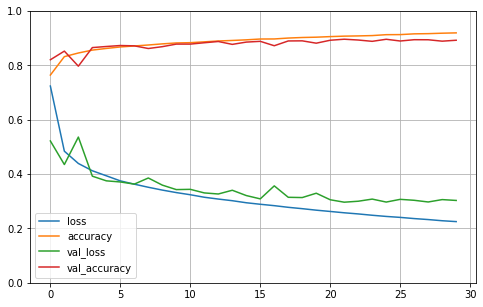

In [15]:

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
X_new = x_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [17]:
np.array(classnames)[y_pred]

array(['Ankel Boot', 'Pullover', 'Trouser'], dtype='<U10')

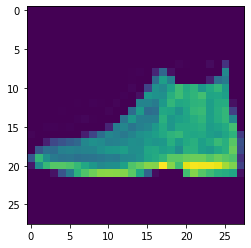

In [18]:
plt.imshow(X_new[0])